In [2]:
import pandas as pd

In [4]:
df = pd.DataFrame(
    {"Colors": ["R", "B", "G", "G", "G", "R", "B", "B"],
    "Target": [1,0,0,0,0,1,0,0]}
)
target_mean = df.groupby("Colors")["Target"].mean()
df["color_target_mean"] = df["Colors"].map(target_mean)

,Colors,Target,color_target_mean
0,R,1,1.0
1,B,0,0.0
2,G,0,0.0
3,G,0,0.0
4,G,0,0.0
5,R,1,1.0
6,B,0,0.0
7,B,0,0.0


In [5]:
!pip install category_encoders

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.0 MB 8.4 MB/s eta 0:00:02
   -------------- ------------------------- 3.9/11.0 MB 10.2 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.0 MB 10.0 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 9.1 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.0 MB 8.5 MB/s eta 0:00:01
   ------------------------------------- -- 10.2/11.0 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 8.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.8 MB 6.7 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.8 MB 7.0 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.8 MB 7.1 MB/s eta 0:00:01
   ------------------------ --------------- 6.0/9.8 MB 7.2 MB/s eta 0:00:01
   -----------

In [9]:
from category_encoders import BinaryEncoder
df = pd.DataFrame(
    {"Colors": ["R", "B", "G", "G", "L","A","O" "G", "R", "B", "B"]}
    )

encoder = BinaryEncoder()
df_binary = encoder.fit_transform(df["Colors"])
print(df)
df_binary

  Colors
0      R
1      B
2      G
3      G
4      L
5      A
6     OG
7      R
8      B
9      B


,Colors_0,Colors_1,Colors_2
0,0,0,1
1,0,1,0
2,0,1,1
3,0,1,1
4,1,0,0
5,1,0,1
6,1,1,0
7,0,0,1
8,0,1,0
9,0,1,0


In [10]:
data = {"Size": ["Small", "Medium", "Large"]}

df = pd.DataFrame(data)
size_mapping = {"Small": 1, "Medium":2, "Large": 3}
df["Size_ceva"] = df["Size"].map(size_mapping)
df

,Size,Size_ceva
0,Small,1
1,Medium,2
2,Large,3


In [24]:
from scipy.stats import boxcox

data = {"Income":[123132, 30000, 40000, 70000, 100000, 120000, 25000]}
df = pd.DataFrame(data)

df["boxcox"], _ = boxcox(df["Income"])
df

,Income,boxcox
0,123132,127.499054
1,30000,80.244638
2,40000,88.231669
3,70000,106.025984
4,100000,119.135438
5,120000,126.433212
6,25000,75.548174


<Axes: xlabel='Income', ylabel='Count'>

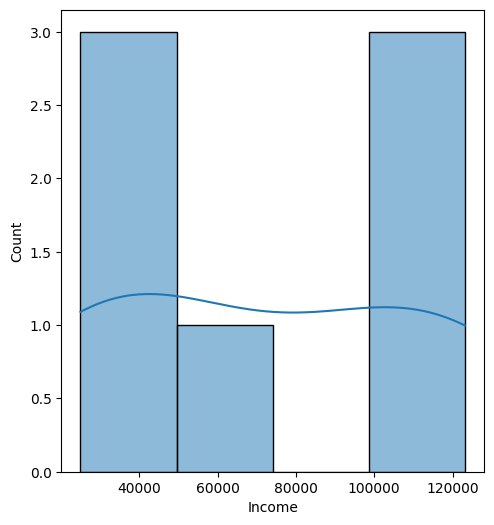

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.histplot(df["Income"], kde= True)

<Axes: xlabel='boxcox', ylabel='Count'>

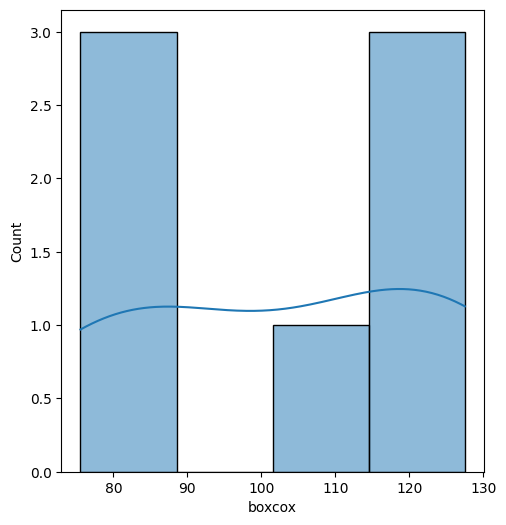

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.histplot(df["boxcox"], kde= True)

In [35]:
df = pd.DataFrame({
    "Feature 1": [5,4,4,5,3],
    "Target":[12,14,16,14,10]
})

print(df.corr())

           Feature 1  Target
Feature 1     1.0000  0.3669
Target        0.3669  1.0000


In [39]:
import statsmodels.api as sm 

df = pd.DataFrame({
    "Feature 1": [5,4,4,5,3],
    "Feature 2":[69, 96, 15, 3, 0.5],
    "Target": [12,14,16,14,10]
})

x = df[["Feature 1", "Feature 2"]]
y = df["Target"]
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()
p_value = model.pvalues
print(p_value)#Cu cat mai mica valoarea, cu atat mai bine

const        0.361196
Feature 1    0.643572
Feature 2    0.994383
dtype: float64
